# 

In [239]:
%matplotlib notebook

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import statsmodels.api as sm
from gekko import GEKKO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from pylab import pi, title, scatter, show, legend, xlabel, ylabel
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.api import add_constant

In [325]:
d = pd.read_table("/Users/alex/Downloads/project/finalData_2m", delim_whitespace=True)
ds = pd.read_table("/Users/alex/Downloads/project/finalData_2msun", delim_whitespace=True)


# convert each parmeter from dataframe to an array
Sw = d['S'].values
Tp = d['Tp'].values
Fric = d['Fric'].values
WLEV = d['WLEV'].values
HR = d['HR'].values
RES = d['RES'].values
twop = d['2%'].values
Setm = d['Set'].values
Hss = d['Hss'].values
Hig = d['Hig'].values
MO = d['Overwash'].values
Hb = d['Hb'].values

Sws = ds['S'].values
Tps = ds['Tp'].values
Frics = ds['Fric'].values
WLEVs = ds['WLEV'].values
HRs = ds['HR'].values
RESs = ds['RES'].values
twops = ds['2%'].values
Setms = ds['Set'].values
Hsss = ds['Hss'].values
Higs = ds['Hig'].values
MOs = ds['Overwash'].values

ds.dropna(inplace=True)
d.dropna(inplace=True)

len(Sw)

405

<IPython.core.display.Javascript object>


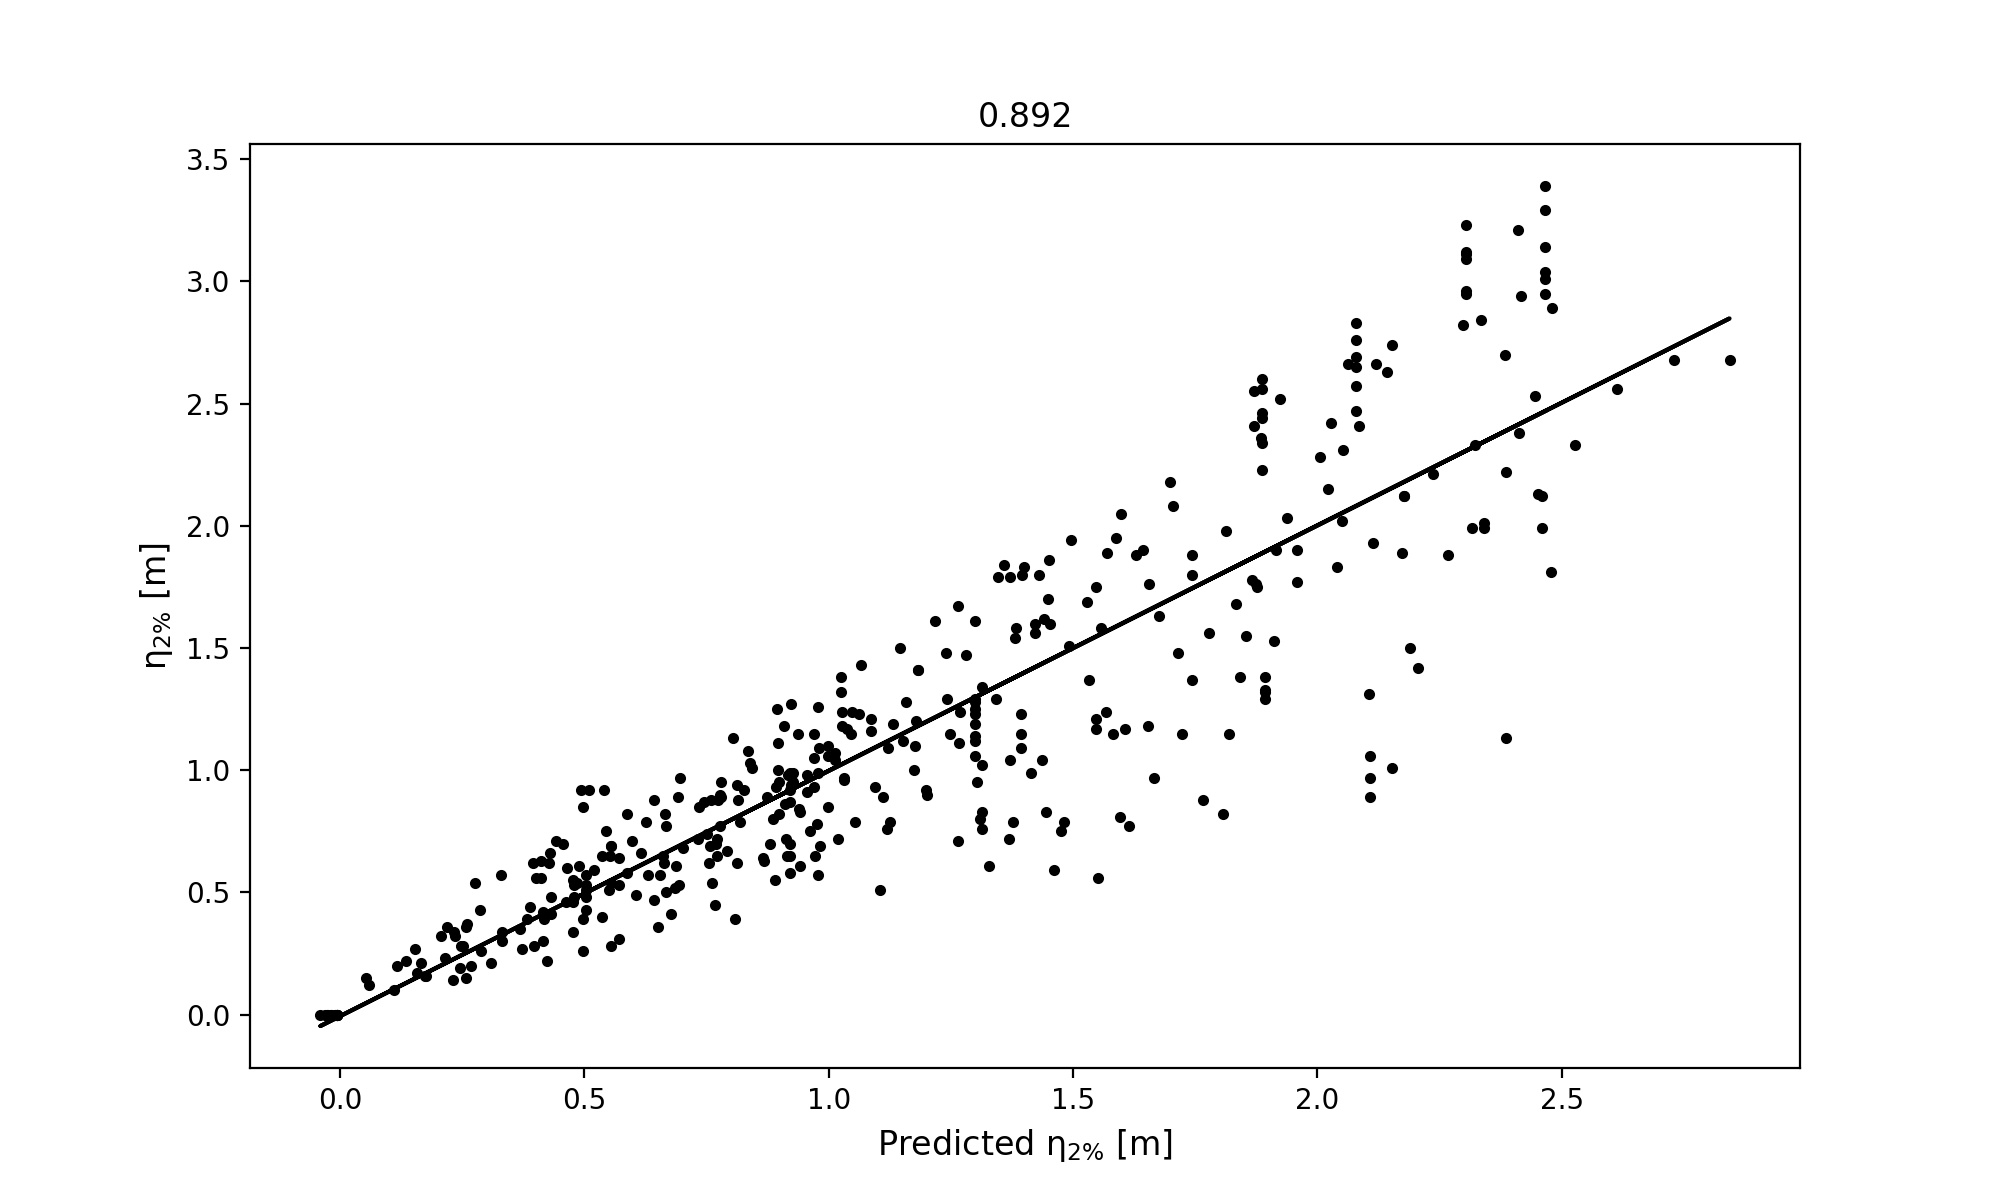

0.892


In [363]:
import numpy.linalg as lin

num = np.ones(len(Fric)) # intercepts
var=twop

fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
plt.subplots_adjust(hspace=0.3)

# Stack: Join a sequence of arrays along a new axis - then take the 
# Transpose of the 3xn matrix with the .T.
A = np.stack([Fric, Hb, Fric*Hb]).T
# get regression coefficients
coeffs = np.linalg.lstsq(A, var, rcond=None)[0]

# get best guess of y using the linear combinations of the predictors; 
# X-axis: eta-2 = (c*Hb + d)Cn + b
#         eta-2 = c*Hb*Cn + d*Cn + b
pred_y = A@coeffs

# Dot Prod: Inner product of the vectors (1D arrays)
b1 = np.dot(pred_y-pred_y.mean(),var-var.mean())/np.dot(pred_y-pred_y.mean(),pred_y-pred_y.mean())
fit1 = var.mean()+b1*(pred_y-pred_y.mean())

# scatter plot of y vs pred_y
ax.plot(pred_y, var, ".", color='k')
ax.plot(pred_y,fit1, color='k')

eta="\u03B7"
ax.set_ylabel(eta+'$_{2\%}$ [m]', fontsize=12)
ax.set_xlabel('Predicted '+eta+'$_{2\%}$ [m]', fontsize=12)

r = round(np.corrcoef(pred_y, var)[0, 1], 3)
ax.set_title(r)


print(r)

<IPython.core.display.Javascript object>


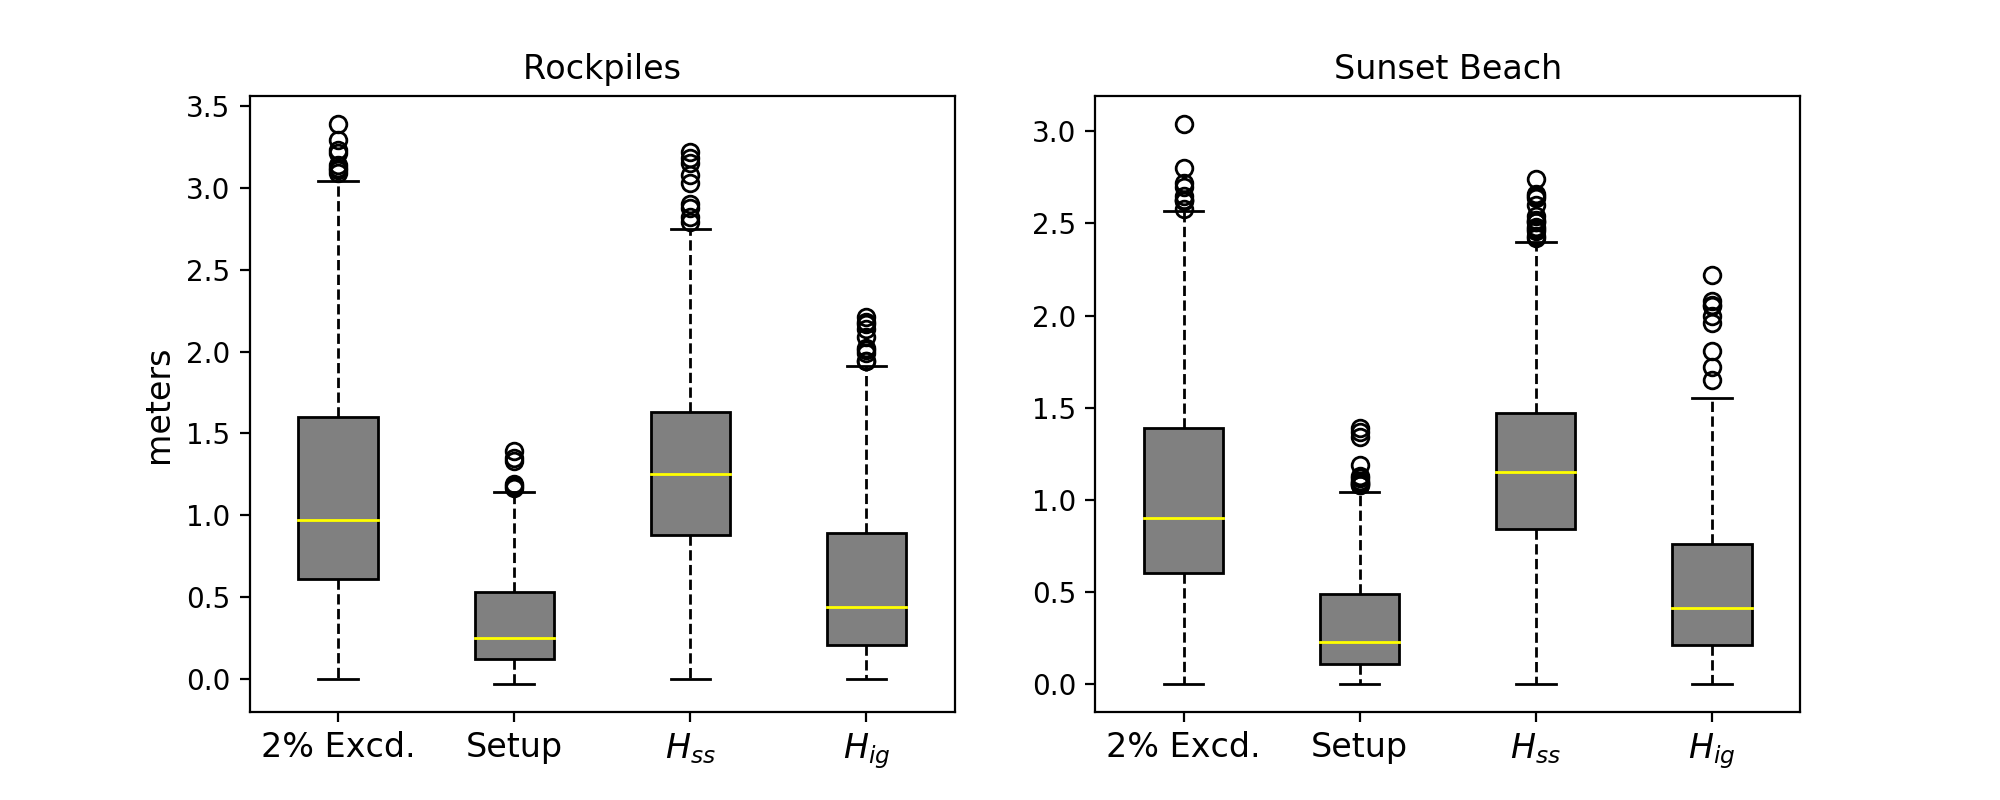

,S,Tp,Fric,WLEV,HR,RES,2%,Set,Hss,Hig,Overwash,Hb
count,405.000000,405.000000,405.000000,405.000000,405.0,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,3.733333,13.229630,0.125790,0.331593,2.0,7.708642,1.158914,0.350593,1.290321,0.606123,0.044444,9.578319
std,2.048424,2.650259,0.074022,0.382310,0.0,1.751675,0.773313,0.307725,0.635115,0.516848,0.206335,4.649159
min,0.000000,9.000000,0.000000,-0.350000,2.0,5.000000,0.000000,-0.030000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,11.000000,0.060000,0.000000,2.0,6.000000,0.610000,0.120000,0.880000,0.210000,0.000000,5.977000
50%,4.000000,13.000000,0.120000,0.400000,2.0,8.000000,0.970000,0.250000,1.250000,0.440000,0.000000,9.835000
75%,5.250000,15.000000,0.190000,0.650000,2.0,9.000000,1.600000,0.530000,1.630000,0.890000,0.000000,14.056000
max,7.000000,18.000000,0.250000,0.900000,2.0,10.000000,3.390000,1.390000,3.220000,2.210000,1.000000,18.547000


In [226]:
# Data Summary and Overview

def get_boxnwhiskers():

    '''
    Configure a box and whisker plot of each model output parm. in one image to highlight
    the model distributions. 
    '''

    fig = plt.figure(figsize=(10,4))
    ax = plt.subplot(1,2,1)
    bp = plt.boxplot([twop, Setm, Hss, Hig], notch=False, patch_artist=True)
    for box in bp['boxes']:

        # change outline color
        box.set(color='black')
        box.set(facecolor='grey', linewidth=1)

    for median in bp['medians']:
        median.set(color='yellow', linewidth=1)

    for flier in bp['fliers']:
        flier.set(marker='o', color='red')

    for whisker in bp['whiskers']:
        whisker.set(linewidth=1, linestyle='--')

    plt.xticks([1,2,3,4], ['2% Excd.', 'Setup', '$H_{ss}$', '$H_{ig}$'], fontsize=12)
    # plt.text(0.0125, 1.065, 'SWASH Sensitivity Analysis\nn=300 Random Model Input: Swell, Tp, WLEV, Fric, Res', 
    #          color='black', transform = ax.transAxes,  fontsize=16)
    plt.ylabel('meters', fontsize=12)
    plt.title('Rockpiles')
    
    
    ax = plt.subplot(1,2,2)
    bp = plt.boxplot([twops, Setms, Hsss, Higs], notch=False, patch_artist=True)
    for box in bp['boxes']:

        # change outline color
        box.set(color='black')
        box.set(facecolor='grey', linewidth=1)

    for median in bp['medians']:
        median.set(color='yellow', linewidth=1)

    for flier in bp['fliers']:
        flier.set(marker='o', color='red')

    for whisker in bp['whiskers']:
        whisker.set(linewidth=1, linestyle='--')

    plt.xticks([1,2,3,4], ['2% Excd.', 'Setup', '$H_{ss}$', '$H_{ig}$'], fontsize=12)
    # plt.text(0.0125, 1.065, 'SWASH Sensitivity Analysis\nn=300 Random Model Input: Swell, Tp, WLEV, Fric, Res', 
    #          color='black', transform = ax.transAxes,  fontsize=16)
    # plt.ylabel('meters', fontsize=12)
    plt.title('Sunset Beach')
    
    return

get_boxnwhiskers()
plt.savefig('boxnwhiskers', dpi=96)
# Print data summary and stats overview
d.describe()
# ds.describe()


In [227]:
ivs = d.loc[:, "S":"RES"]
mn = d.min(axis=0)
mx = d.max(axis=0)
ivs_nrm = (ivs - mn) / (mx - mn) - 0.5

dvs = d.loc[:, "2%":"Hig"]
dvs -= dvs.mean(axis=0)
# print(dvs)

In [228]:
coeffs = np.linalg.lstsq(ivs, dvs, rcond=None)[0]
prediction = ivs @ coeffs
prediction.columns = dvs.columns

In [229]:
coeffs

array([[ 2.37618740e-01,  1.04169854e-01,  1.87841345e-01,
         1.36371037e-01],
       [ 1.31487977e-01,  4.97092983e-02,  9.49773768e-02,
         8.56127139e-02],
       [-4.27841379e+00, -1.10258277e+00, -3.54397852e+00,
        -3.54730093e+00],
       [ 1.62068003e-01, -2.37596017e-02,  3.58095207e-01,
        -2.63531430e-02],
       [-9.67136484e-01, -4.44534876e-01, -7.16029315e-01,
        -5.36018746e-01],
       [-2.69739571e-02, -1.41323345e-03, -2.57730828e-02,
        -1.48861000e-02]])

<IPython.core.display.Javascript object>


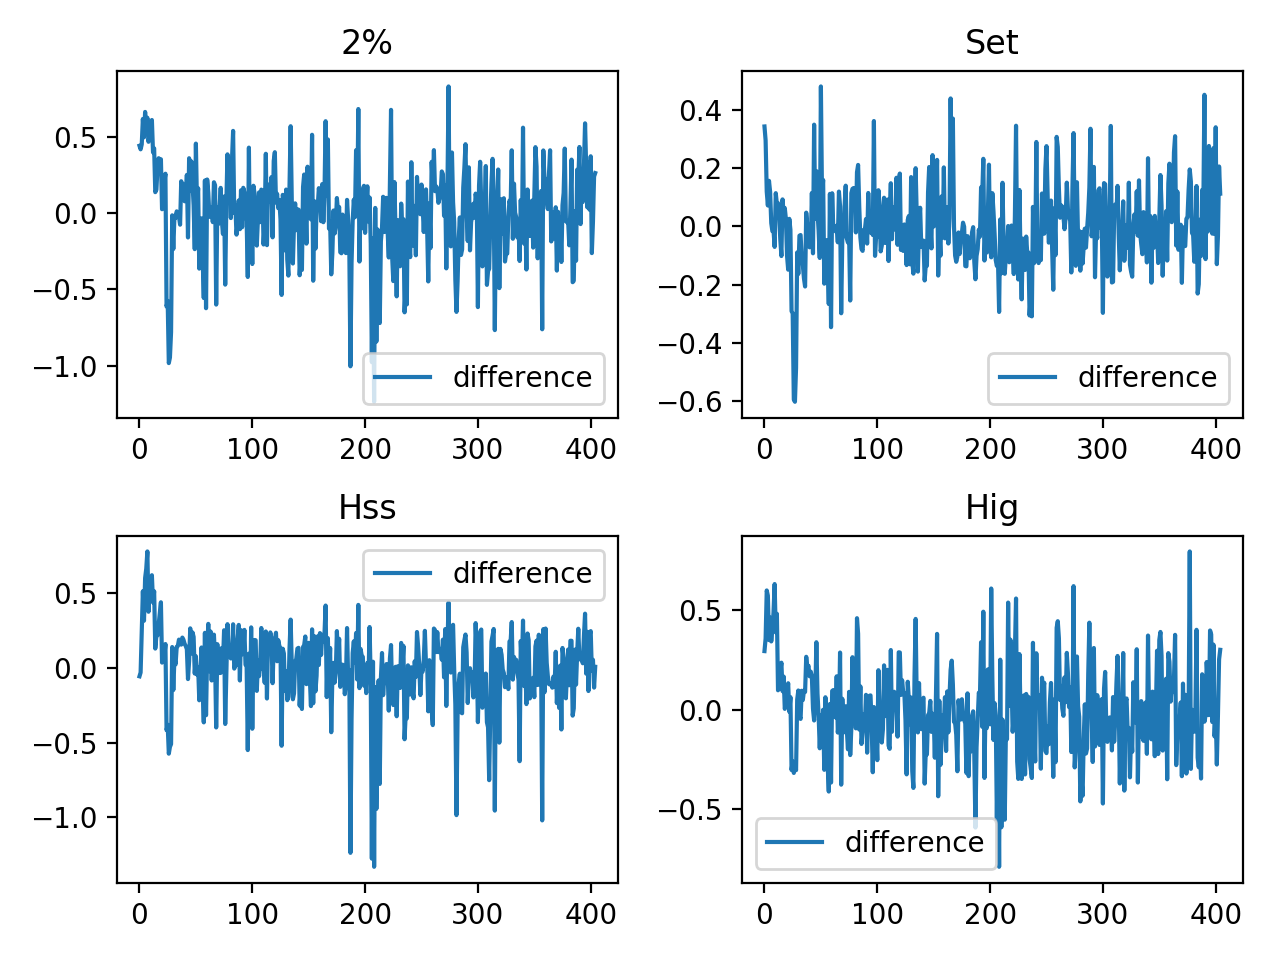

In [230]:
def scratch_regression_plot(ax, v):
    #ax.plot(dvs[v], label="SWASH")
    #ax.plot(prediction[v], label="regression")
    ax.plot(dvs[v] - prediction[v], label="difference")
    ax.legend()
    ax.set_title(v)


fig, axes = plt.subplots(nrows=2, ncols=2)
axes = axes.flatten()
for k, v in enumerate(dvs.columns):
    scratch_regression_plot(axes[k], v)

fig.tight_layout()

<IPython.core.display.Javascript object>


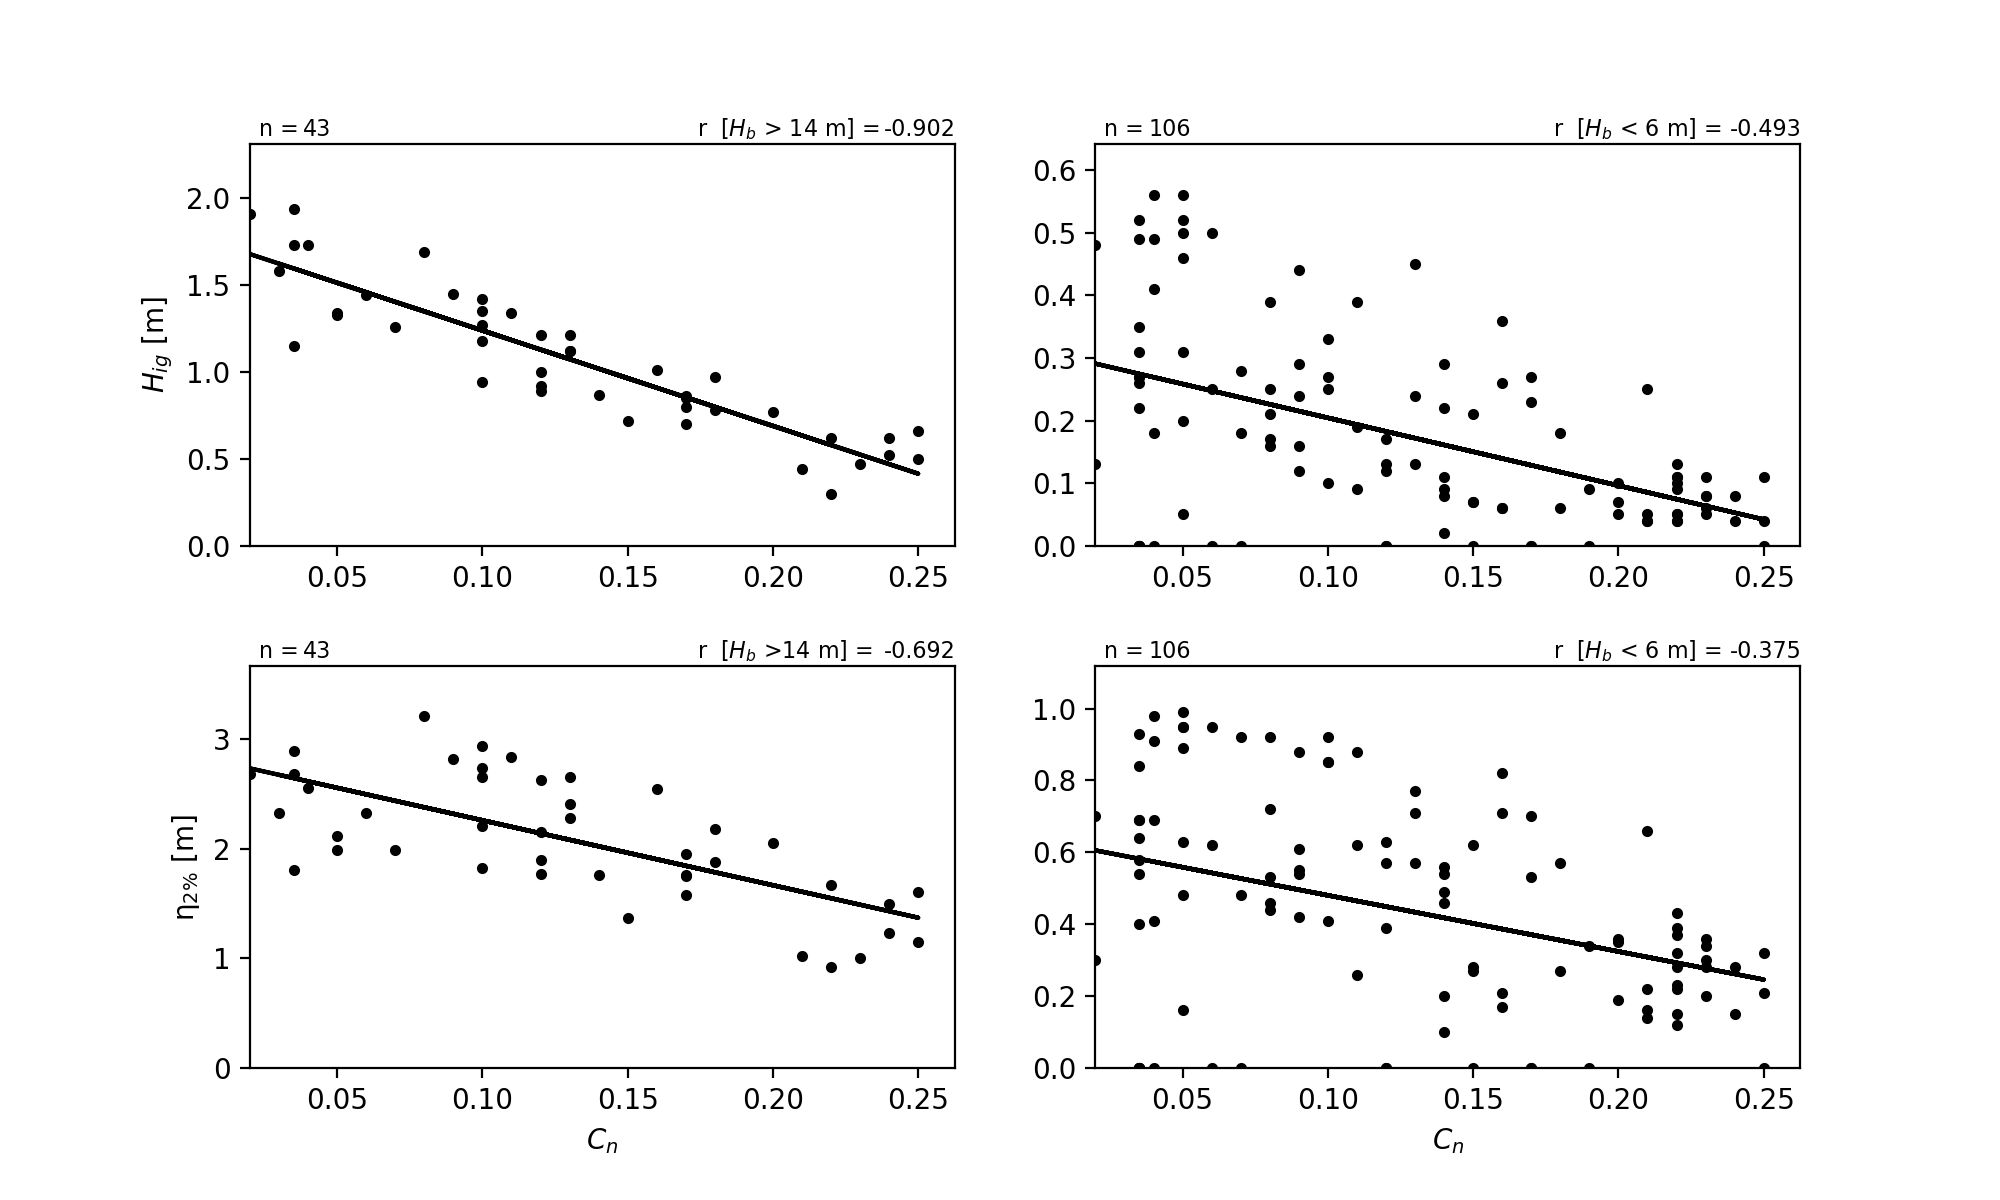

In [234]:
def get_swash_scatter_regression():

    '''
      Get scatter plot with least squares regression best fit between model input and output.
                - includes correlation coefficient
                - parms: Sw, Tp, Fric, WLEV, HR, RES, twop, Setm, Hss, Hig
    '''
    
    fig = plt.figure(figsize=(10,6))
    
    ax = plt.subplot(221)
    plt.subplots_adjust(hspace=0.3)
    
    # Which parms would you like to find the correlation between
    x1 = Fric[Hb>=15]
    y1 = Hig[Hb>=15]
    record1 = len(x1)
   
    # get 2% scatter and regression
    # fig = plt.figure(figsize = (12, 8))
    
    b1 = np.dot(x1-x1.mean(),y1-y1.mean())/np.dot(x1-x1.mean(),x1-x1.mean())
    fit1 = y1.mean()+b1*(x1-x1.mean())
    
    #b8 = np.dot(x1[Hb<7]-x1[Hb<7].mean(),y1[Hb<7]-y1[Hb<7].mean())/np.dot(x1[Hb<7]-x1[Hb<7].mean(),x1[Hb<7]-x1[Hb<7].mean())
    #fit8 = y1[Hb<7].mean()+b8*(x1[Hb<7]-x1[Hb<7].mean())
    
    #b13 = np.dot(x1[Hb>13]-x1[Hb>13].mean(),y1[Hb>13]-y1[Hb>13].mean())/np.dot(x1[Hb>13]-x1[Hb>13].mean(),x1[Hb>13]-x1[Hb>13].mean())
    #fit13 = y1[Hb>13].mean()+b13*(x1[Hb>13]-x1[Hb>13].mean())
    
    
   
    ax.plot(x1, y1, ".", b1, color='black')
    #ax.plot(x1[Hb<7],fit8, color='red')
    #ax.plot(x1[Hb>13],fit13, color='green')
    ax.plot(x1,fit1, color='black')
    ax.grid(False)
    #ax.set_ylabel('2% Excd. [m]', fontsize=10)
    ax.set_ylabel('$H_{ig}$ [m]', fontsize=10)
    #ax.set_xlabel('$C_{n}$')
    
    # define the y and x axis maximums based on data
    maxx1 = max(x1)
    minx1 = min(x1)

    ax.set_ylim(ymin=0)
    # ax.set_ylim(ymax=maxHs+5)
    ax.set_xlim(xmin=minx1)
    # ax.set_xlim(xmax=maxHs+5)

    # get CC
    r = round(np.corrcoef(x1, y1)[0, 1], 3)
    #r1 = round(np.corrcoef(x1[Hb>12], y1[Hb>12])[0, 1], 3)
    #r2 = round(np.corrcoef(x1[Hb<8], y1[Hb<8])[0, 1], 3)
    
    plt.text(0.635, 1.02, 'r  [$H_{b}$ > 14 m] =', color='k', transform = ax.transAxes, 
             fontsize=8)
    plt.text(0.9, 1.02, r, color='k', transform = ax.transAxes, 
             fontsize=8)
    
    #plt.text(0.72, 1.05, 'r [$H_{b}$ <  7 m] =', color='red', transform = ax.transAxes, 
    #         fontsize=8)
    #plt.text(0.875, 1.05, r2, color='red', transform = ax.transAxes, 
    #         fontsize=8)
    
    #plt.text(0.72, 1.02, 'r [$H_{b}$ > 13 m]  =', color='green', transform = ax.transAxes, 
    #         fontsize=8)
    #plt.text(0.875, 1.02, r1, color='green', transform = ax.transAxes, 
    #         fontsize=8)
    
    
    
    plt.text(0.0125, 1.02, 'n = ', color='black', transform = ax.transAxes, 
             fontsize=8)
    plt.text(0.075, 1.02, record1, color='black', transform = ax.transAxes, 
             fontsize=8)
    
    
    ax = plt.subplot(222)
    x1 = Fric[Hb<6]
    y1 = Hig[Hb<6]
    record1 = len(x1)
    
    b1 = np.dot(x1-x1.mean(),y1-y1.mean())/np.dot(x1-x1.mean(),x1-x1.mean())
    fit1 = y1.mean()+b1*(x1-x1.mean())
   
    ax.plot(x1, y1, ".", b1, color='black')
    ax.plot(x1,fit1, color='black')
    ax.grid(False)
    
    # define the y and x axis maximums based on data
    maxx1 = max(x1)
    minx1 = min(x1)

    ax.set_ylim(ymin=0)
    ax.set_xlim(xmin=minx1)
    

    # get CC
    r = round(np.corrcoef(x1, y1)[0, 1], 3)
    
    plt.text(0.65, 1.02, 'r  [$H_{b}$ < 6 m] =', color='k', transform = ax.transAxes, 
             fontsize=8)
    plt.text(0.9, 1.02, r, color='k', transform = ax.transAxes, 
             fontsize=8)
    plt.text(0.0125, 1.02, 'n = ', color='black', transform = ax.transAxes, 
             fontsize=8)
    plt.text(0.075, 1.02, record1, color='black', transform = ax.transAxes, 
             fontsize=8)
    
    ax = plt.subplot(223)
    # Which parms would you like to find the correlation between
    x1 = Fric[Hb>=15]
    y1 = twop[Hb>=15]
    record1 = len(x1)
    
    b1 = np.dot(x1-x1.mean(),y1-y1.mean())/np.dot(x1-x1.mean(),x1-x1.mean())
    fit1 = y1.mean()+b1*(x1-x1.mean())
   
    ax.plot(x1, y1, ".", b1, color='black')
    ax.plot(x1,fit1, color='black')
    ax.grid(False)
    eta="\u03B7"
    ax.set_ylabel(eta+'$_{2\%}$ [m]', fontsize=10)
    ax.set_xlabel('$C_{n}$')
    
    # define the y and x axis maximums based on data
    maxx1 = max(x1)
    minx1 = min(x1)

    ax.set_ylim(ymin=0)
    ax.set_xlim(xmin=minx1)

    # get CC
    r = round(np.corrcoef(x1, y1)[0, 1], 3)
    
    plt.text(0.635, 1.02, 'r  [$H_{b}$ >14 m] =', color='k', transform = ax.transAxes, 
             fontsize=8)
    plt.text(0.9, 1.02, r, color='k', transform = ax.transAxes, 
             fontsize=8)
    plt.text(0.0125, 1.02, 'n = ', color='black', transform = ax.transAxes, 
             fontsize=8)
    plt.text(0.075, 1.02, record1, color='black', transform = ax.transAxes, 
             fontsize=8)
    
    ax = plt.subplot(224)
    # Which parms would you like to find the correlation between
    x1 = Fric[Hb<6]
    y1 = twop[Hb<6]
    record1 = len(x1)
    
    b1 = np.dot(x1-x1.mean(),y1-y1.mean())/np.dot(x1-x1.mean(),x1-x1.mean())
    fit1 = y1.mean()+b1*(x1-x1.mean())
   
    ax.plot(x1, y1, ".", b1, color='black')
    ax.plot(x1,fit1, color='k')
    ax.grid(False)
    ax.set_xlabel('$C_{n}$')
    
    # define the y and x axis maximums based on data
    maxx1 = max(x1)
    minx1 = min(x1)

    ax.set_ylim(ymin=0)
    # ax.set_ylim(ymax=maxHs+5)
    ax.set_xlim(xmin=minx1)
    # ax.set_xlim(xmax=maxHs+5)

    # get CC
    r = round(np.corrcoef(x1, y1)[0, 1], 3)
    plt.text(0.65, 1.02, 'r  [$H_{b}$ < 6 m] =', color='k', transform = ax.transAxes, 
             fontsize=8)
    plt.text(0.9, 1.02, r, color='k', transform = ax.transAxes, 
             fontsize=8)
    plt.text(0.0125, 1.02, 'n = ', color='black', transform = ax.transAxes, 
             fontsize=8)
    plt.text(0.075, 1.02, record1, color='black', transform = ax.transAxes, 
             fontsize=8)
    
    #fig.tight_layout()
    
get_swash_scatter_regression()
plt.savefig('linearReg_ULquartiles', dpi=96)

<IPython.core.display.Javascript object>


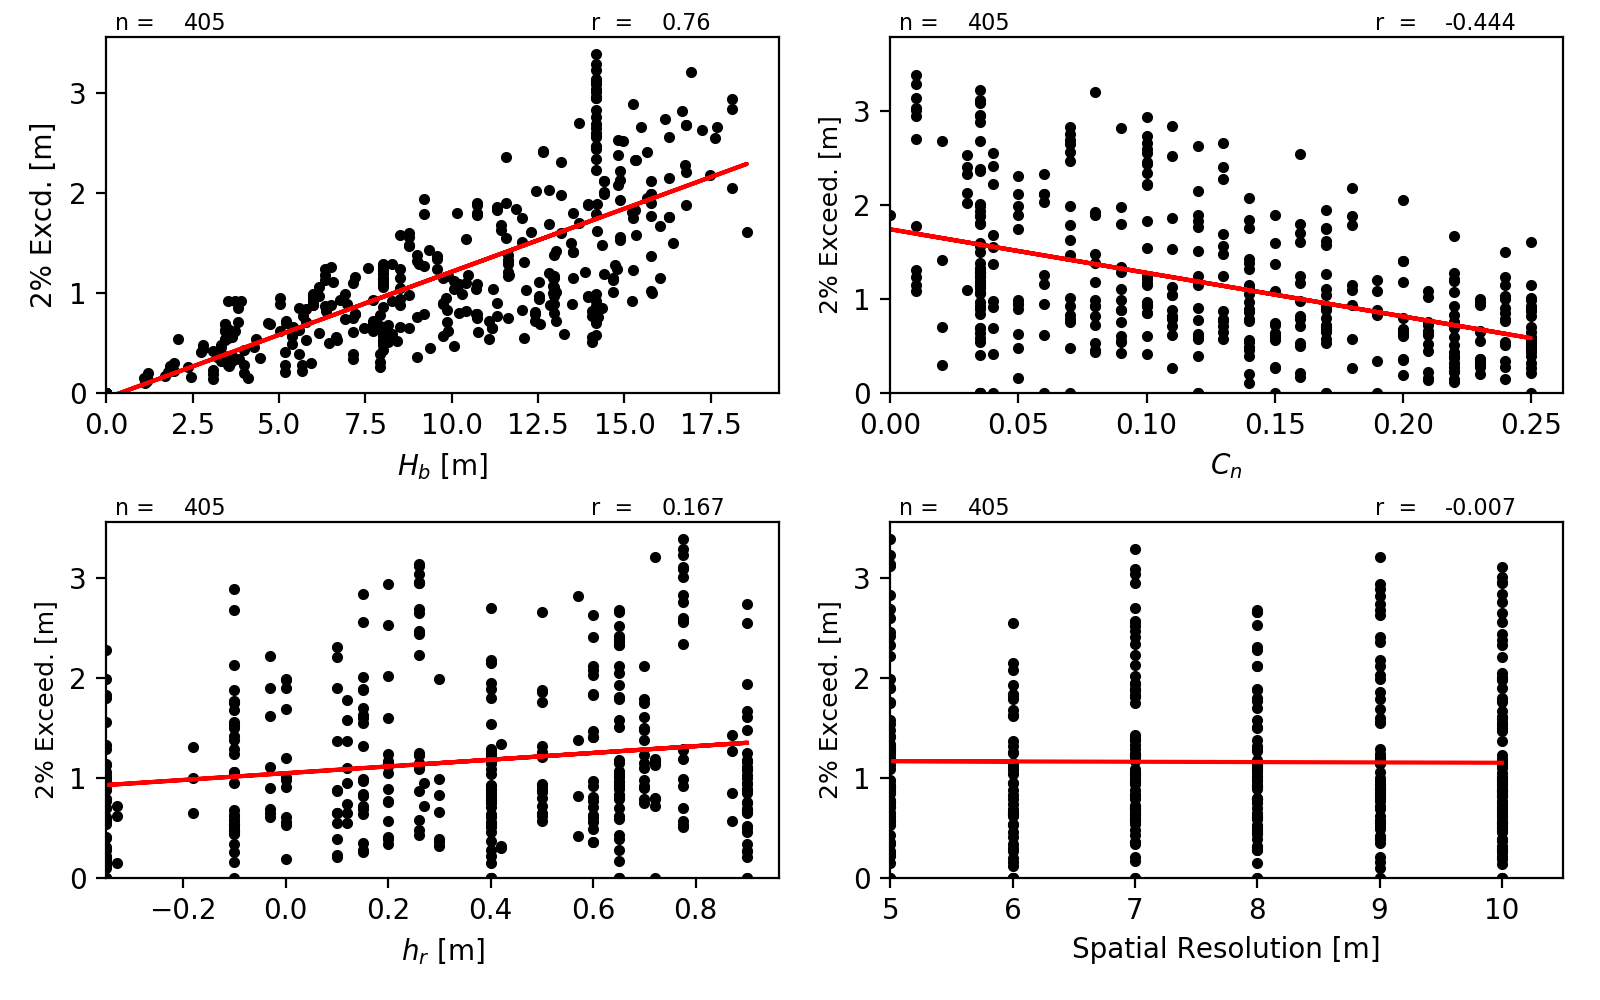

In [8]:
def get_swash_scatter_regression():

    '''
      Get scatter plot with least squares regression best fit between model input and output.
                - includes correlation coefficient
                - parms: Sw, Tp, Fric, WLEV, HR, RES, twop, Setm, Hss, Hig
    '''
    
    fig = plt.figure(figsize=(8,5))
    ax = plt.subplot(2,2,1)
    
    # Which parms would you like to find the correlation between
    x1 = Hb
    y1 = twop
    record1 = len(x1)
   
    # get 2% scatter and regression
    # fig = plt.figure(figsize = (12, 8))
    
    b1 = np.dot(x1-x1.mean(),y1-y1.mean())/np.dot(x1-x1.mean(),x1-x1.mean())
    fit1 = y1.mean()+b1*(x1-x1.mean())
   
    ax.plot(x1, y1, ".", b1, color='black')
    ax.plot(x1,fit1, color='red')
    ax.grid(True)
    ax.xaxis.grid(b=True, which='major', color='white', linestyle='-')
    ax.yaxis.grid(b=True, which='major', color='white', linestyle='-')
    ax.set_ylabel('2% Excd. [m]', fontsize=10)
    ax.set_xlabel('$H_{b}$ [m]')
    
    # define the y and x axis maximums based on data
    maxx1 = max(x1)
    minx1 = min(x1)

    ax.set_ylim(ymin=0)
    # ax.set_ylim(ymax=maxHs+5)
    ax.set_xlim(xmin=minx1)
    # ax.set_xlim(xmax=maxHs+5)

    # get CC
    r1 = round(np.corrcoef(x1, y1)[0, 1], 3)
    plt.text(0.72, 1.02, 'r  =', color='black', transform = ax.transAxes, 
             fontsize=8)
    plt.text(0.825, 1.02, r1, color='black', transform = ax.transAxes, 
             fontsize=8)
    plt.text(0.0125, 1.02, 'n = ', color='black', transform = ax.transAxes, 
             fontsize=8)
    plt.text(0.115, 1.02, record1, color='black', transform = ax.transAxes, 
             fontsize=8)
    
    ax = plt.subplot(2,2,2)
    
    # Which parms would you like to find the correlation between
    x1 = Fric
    y1 = twop
    record1 = len(x1)
   
    # get 2% scatter and regression
    # fig = plt.figure(figsize = (12, 8))
    
    b1 = np.dot(x1-x1.mean(),y1-y1.mean())/np.dot(x1-x1.mean(),x1-x1.mean())
    fit1 = y1.mean()+b1*(x1-x1.mean())
   
    ax.plot(x1, y1, ".", b1, color='black')
    ax.plot(x1,fit1, color='red')
    ax.grid(True)
    ax.xaxis.grid(b=True, which='major', color='white', linestyle='-')
    ax.yaxis.grid(b=True, which='major', color='white', linestyle='-')
    ax.set_ylabel('2% Exceed. [m]', fontsize=9)
    ax.set_xlabel('$C_{n}$')
    
    # define the y and x axis maximums based on data
    maxx1 = max(x1)
    minx1 = min(x1)

    ax.set_ylim(ymin=0)
    # ax.set_ylim(ymax=maxHs+5)
    ax.set_xlim(xmin=minx1)
    # ax.set_xlim(xmax=maxHs+5)

    # get CC
    r1 = round(np.corrcoef(x1, y1)[0, 1], 3)
    plt.text(0.72, 1.02, 'r  =', color='black', transform = ax.transAxes, 
             fontsize=8)
    plt.text(0.825, 1.02, r1, color='black', transform = ax.transAxes, 
             fontsize=8)
    plt.text(0.0125, 1.02, 'n = ', color='black', transform = ax.transAxes, 
             fontsize=8)
    plt.text(0.115, 1.02, record1, color='black', transform = ax.transAxes, 
             fontsize=8)
    
    ax = plt.subplot(2,2,3)
    
    # Which parms would you like to find the correlation between
    x1 = WLEV
    y1 = twop
    record1 = len(x1)
   
    # get 2% scatter and regression
    # fig = plt.figure(figsize = (12, 8))
    
    b1 = np.dot(x1-x1.mean(),y1-y1.mean())/np.dot(x1-x1.mean(),x1-x1.mean())
    fit1 = y1.mean()+b1*(x1-x1.mean())
   
    ax.plot(x1, y1, ".", b1, color='black')
    ax.plot(x1,fit1, color='red')
    ax.grid(True)
    ax.xaxis.grid(b=True, which='major', color='white', linestyle='-')
    ax.yaxis.grid(b=True, which='major', color='white', linestyle='-')
    ax.set_ylabel('2% Exceed. [m]', fontsize=9)
    ax.set_xlabel('$h_{r}$ [m]')
    
    # define the y and x axis maximums based on data
    maxx1 = max(x1)
    minx1 = min(x1)

    ax.set_ylim(ymin=0)
    # ax.set_ylim(ymax=maxHs+5)
    ax.set_xlim(xmin=minx1)
    # ax.set_xlim(xmax=maxHs+5)

    # get CC
    r1 = round(np.corrcoef(x1, y1)[0, 1], 3)
    plt.text(0.72, 1.02, 'r  =', color='black', transform = ax.transAxes, 
             fontsize=8)
    plt.text(0.825, 1.02, r1, color='black', transform = ax.transAxes, 
             fontsize=8)
    plt.text(0.0125, 1.02, 'n = ', color='black', transform = ax.transAxes, 
             fontsize=8)
    plt.text(0.115, 1.02, record1, color='black', transform = ax.transAxes, 
             fontsize=8)
    
    ax = plt.subplot(2,2,4)
    
    # Which parms would you like to find the correlation between
    x1 = RES
    y1 = twop
    record1 = len(x1)
   
    # get 2% scatter and regression
    # fig = plt.figure(figsize = (12, 8))
    
    b1 = np.dot(x1-x1.mean(),y1-y1.mean())/np.dot(x1-x1.mean(),x1-x1.mean())
    fit1 = y1.mean()+b1*(x1-x1.mean())
   
    ax.plot(x1, y1, ".", b1, color='black')
    ax.plot(x1,fit1, color='red')
    ax.grid(True)
    ax.xaxis.grid(b=True, which='major', color='white', linestyle='-')
    ax.yaxis.grid(b=True, which='major', color='white', linestyle='-')
    ax.set_ylabel('2% Exceed. [m]', fontsize=9)
    ax.set_xlabel('Spatial Resolution [m]')
    
    # define the y and x axis maximums based on data
    maxx1 = max(x1)
    minx1 = min(x1)

    ax.set_ylim(ymin=0)
    # ax.set_ylim(ymax=maxHs+5)
    ax.set_xlim(xmin=minx1)
    # ax.set_xlim(xmax=maxHs+5)

    # get CC
    r1 = round(np.corrcoef(x1, y1)[0, 1], 3)
    plt.text(0.72, 1.02, 'r  =', color='black', transform = ax.transAxes, 
             fontsize=8)
    plt.text(0.825, 1.02, r1, color='black', transform = ax.transAxes, 
             fontsize=8)
    plt.text(0.0125, 1.02, 'n = ', color='black', transform = ax.transAxes, 
             fontsize=8)
    plt.text(0.115, 1.02, record1, color='black', transform = ax.transAxes, 
             fontsize=8)

    fig.tight_layout()
    # save image
    # plt.savefig(path + buoy + '_scatter_leastSq_bestfit_Hs', dpi = 200, bbox_inches='tight',pad_inches=.3)
    # plt.close()
    return

# plot model output
get_swash_scatter_regression()
plt.savefig('linearReg', dpi=96)

[ 0.12444384 -4.42420911  0.52347263]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     624.6
Date:                Tue, 02 Feb 2021   Prob (F-statistic):          4.68e-124
Time:                        12:22:42   Log-Likelihood:                -183.96
No. Observations:                 405   AIC:                             373.9
Df Residuals:                     402   BIC:                             385.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            

/Users/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


<IPython.core.display.Javascript object>


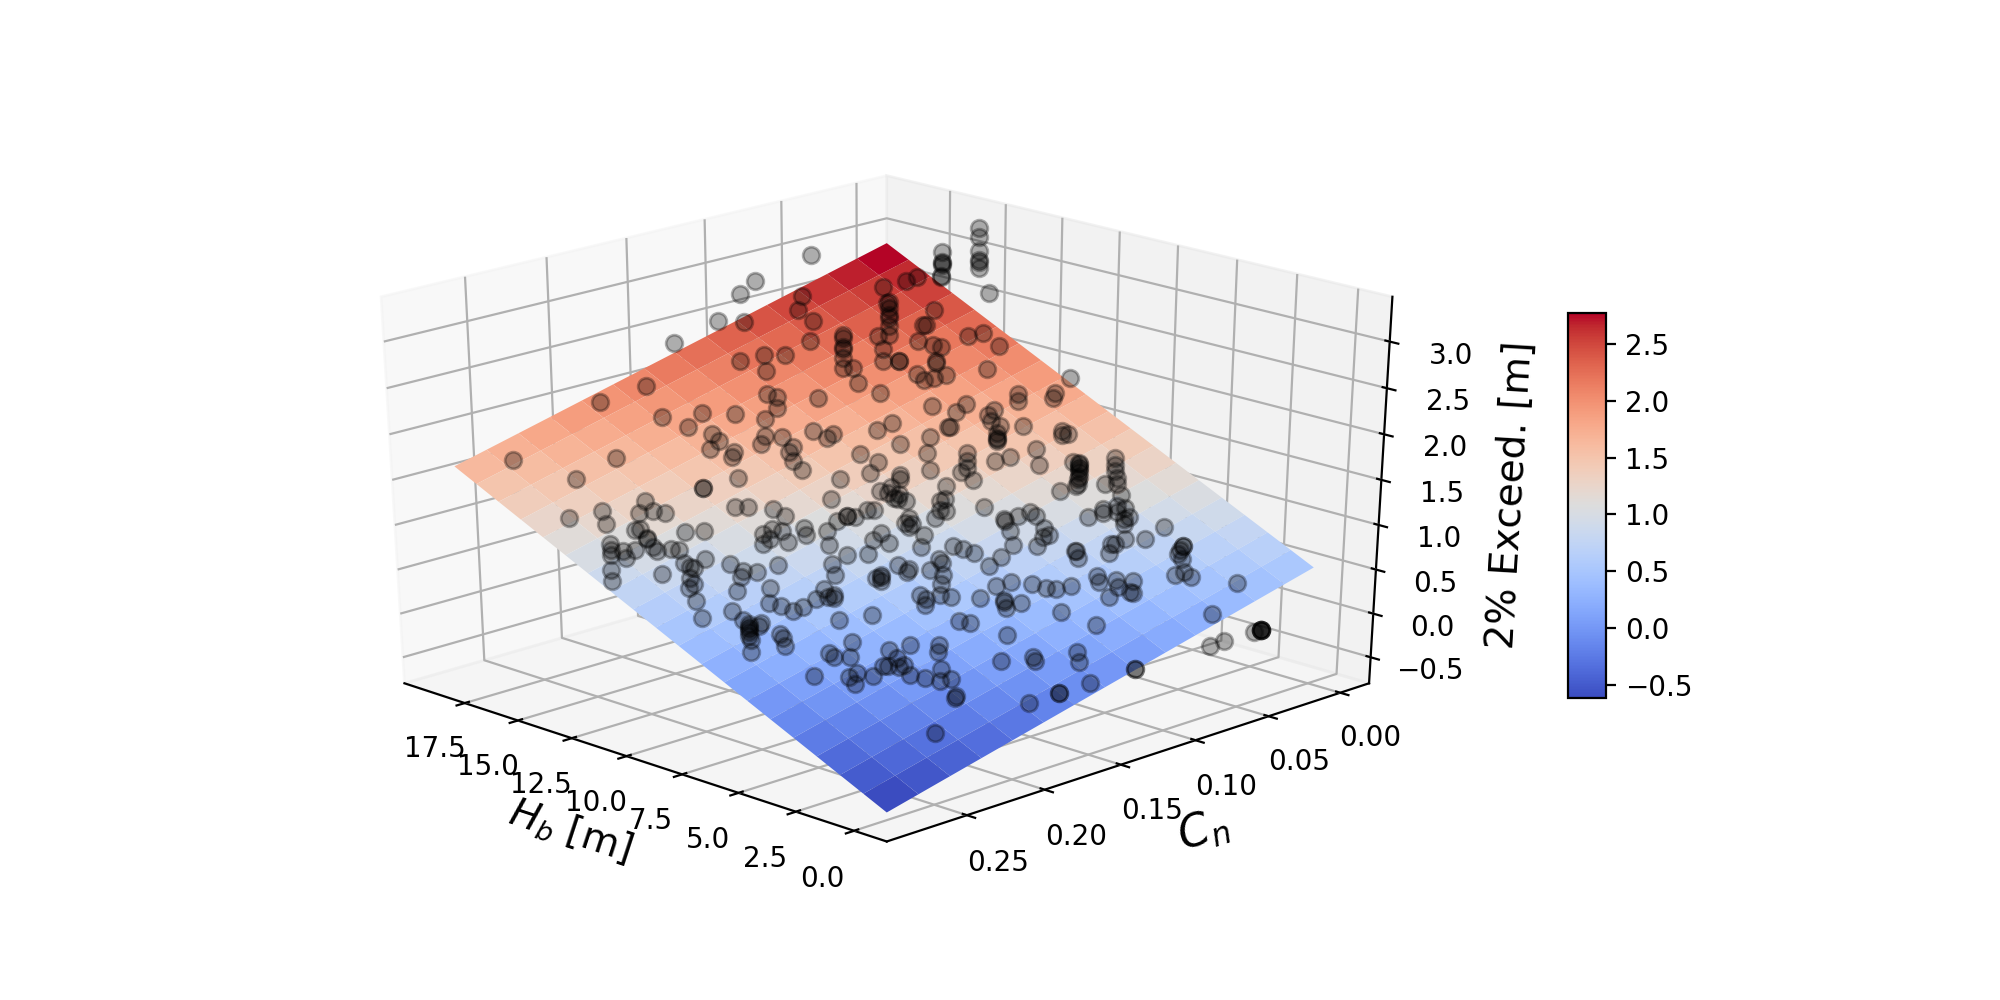

In [10]:
# configure a series of plots to highlight the sensitivity between:
# Hb and Fric (2% Exceed)
# Hb and WLEV (Hss)
# Hb and RES (2% Exceed) * no impact

x0 = Hb
x1 = Fric
y = twop

def rsq(y1,y2):
    yresid= y1 - y2
    SSresid = np.sum(yresid**2)
    SStotal = len(y1) * np.var(y1)
    r2 = 1 - SSresid/SStotal
    return r2

# Method 1: numpy linalg solution
#       Y =     X a
#   X^T Y = X^T X a

X = np.vstack((x0,x1,np.ones(len(x0)))).T
a = np.linalg.lstsq(X,y)[0]; print(a)
yfit = a[0]*x0+a[1]*x1+a[2]
# print('R^2 = '+str(rsq(y,yfit)))

# Method 2: statsmodels ordinary least squares
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
print(model.summary())

# To create a series of images for a gif uncomment the following:
#for angle in range(70,210,2):
fig = plt.figure(figsize=(10,5))
    
ax  = plt.axes(projection='3d')
ax.plot3D(x0,x1,y,'ko', alpha=.3)
x0t = np.arange(0,20,1)
x1t = np.arange(0,0.3,.02)
X0,X1 = np.meshgrid(x0t,x1t)
Yt = a[0]*X0+a[1]*X1+a[2]
surf = ax.plot_surface(X0,X1,Yt,cmap=cm.coolwarm,alpha=1)
# ax.set_ylabel('WLEV [Rel. to MSL (m)]')
ax.set_ylabel('$C_{n}$', fontsize=16)
ax.set_xlabel('$H_{b}$ [m]', fontsize=14)
ax.set_zlabel('2% Exceed. [m]', fontsize=14)
fig.colorbar(surf, shrink=0.5, aspect=10, )

ax.view_init(27, 135)
#filename='/Users/alex/Downloads/regression_surfFric3d_step'+str(angle)
plt.savefig('plane_regress', dpi=96)
plt.gca()


In [9]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

prstd, iv_l, iv_u = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(8,6))

#ax.plot(X, y, 'o', label="data")
#ax.plot(X, y_true, 'b-', label="True")
# ax.plot(X, res.fittedvalues, 'r--.', label="OLS")
#ax.plot(X, iv_u, 'r--')
#ax.plot(X, iv_l, 'r--')
#ax.legend(loc='best');

NameError: name 'model' is not defined

In [ ]:
y = d[['Overwash']]
X = d[["S"]+["Tp"]+["Fric"]+["WLEV"]+["RES"]]

In [ ]:
logit = sm.Logit(y, sm.add_constant(X)).fit()
logit.summary2()
# plt.savefig(lrsum, dpi=96)

INTERPRETING LOGISTIC REGRESSION SUMMARY TABLE ABOVE:

The model summary shows the coefficients, standard error, the associated z-score, and the 95% confidence intervals. We interpret the results as follows, the overall model is significant indicated by a LLR p-value < 0.05 (1.4937e-36) which allows us to look at the rest of the results. 

Numeric Variables:

The coefficients of a logistic regression are in the logit form, i.e. as log odds ratios, as you can see above.

The coefficients are log odds ratios of the marginal effects of the variables in x, and \textrm{Logit}(y) is the sum product of those marginal effects and their respective features, resulting in a log odds (not a ratio). And if you take \textrm{Logistic}(\textrm{Logit}(y)), you return to a probability between 0 and 1.


In [ ]:
from sklearn.linear_model import LogisticRegression
logistic1= LogisticRegression()
logistic1.fit(X,y)

lr_coeffs = np.exp(logistic1.coef_[0])
# lr_coeffs = logistic1.coef_ 
intercept = logistic1.intercept_

#logistic1.params

print(intercept, lr_coeffs)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
logistic1.predict(X)
logistic1.score(X,y)
confusion_matrix(y, logistic1.predict(X))

cm = confusion_matrix(y, logistic1.predict(X))

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center', va='center', color='white', fontsize=18)
plt.show()
plt.savefig('heatmap', dpi=96)

In [ ]:
# logistic1.classes_
# logistic1.intercept_
# logistic1.coef_
#print(classification_report(y, logistic1.predict(X)))
# logit.summary2()
len(Sw)

In [ ]:
from scipy.optimize import curve_fit

# Sigmoid function
def sigmoid(x, x0, k):
    yd = 1/(1 + np.exp(-k*(x-x0)))
    return yd

def sigmoid_derivative(x):
    sd = sigmoid(x, x0, k)
    ds = s*(1-sd)
    return ds

# [-15.87250738] [[ 1.10548391  0.66583807 -1.96268233  0.0644459  -0.08981708
# [-15.87250738] [3.02068585 1.94612083 0.1404811  1.06656788 0.91409837]
# [-16.93305837] [3.19912078 1.96211451 0.13008257 1.08079623]

# Using summary intercept and coef_ output for coefficients
s = (-41.2090+3.3463*Sw+2.0225*Tp-69.8024*Fric)
p = 1/(1 + np.exp(-s))
p.sort()
x1 = arange(-170,171,1)

popt, pcov = curve_fit(sigmoid, x1, p)
y = sigmoid(x1, *popt)

fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
ax.plot(x1, p, "o", color="blue", alpha=0.2, label='data')
ax.plot(x1, y, color="orange", linewidth="1.5",label='fit')
# ax.plot(x1, sigmoid_derivative(p))
plt.legend(loc='best')
plt.title("Sigmoid Curve\nLikelihood of 2% Exceedance Height > 2 m", fontsize=12)
plt.ylabel("Likelihood", fontsize=12)
plt.xlabel("Cases", fontsize=12)
fig.tight_layout()

plt.savefig('sigmoid_curve', dpi=96)

In [ ]:
import scipy.interpolate
from scipy import interpolate

# LR
# -17.97444782] [3.37600977 2.03654232 0.11064601 1.31353302 1.02097721]
# [3.53585035 2.02327886 0.09045018 1.52950194 1.01462984]

# 2.05323208 2.96934319 0.28375867

# High Impact -  s = (-40.97+3.5316*Sw+2.004373*Tp+0.0862064*Fric)
# Extreme s = (-60.74+2.053232*Sw+2.96934*Tp+0.283758*Fric)

# [-22.85020942] [2.05323208 2.96934319 0.28375867 0.68793325 0.92211211]

s = (-60.74+2.053232*Sw+2.96934*Tp+0.283758*Fric)
p = 1/(1 + np.exp(-s))

xii = np.linspace(Tp.min(), Tp.max(), len(Tp))
yii = np.linspace(Sw.min(), Sw.max(), len(Sw))
zii = scipy.interpolate.griddata((Tp,Sw), p, (xii[None,:], yii[:,None]), method='cubic')

fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
plt.pcolormesh(xii,yii,zii, cmap='jet', vmin=0, vmax=1)
plt.plot(Tp,Sw, ".", color='white')
plt.colorbar()
plt.ylabel("Swell [m]", fontsize=12)
plt.xlabel("Tp [sec]", fontsize=12)
plt.title("Impact Level - Extreme\nLikelihood of 2% Exceed. reaching 3m", fontsize=12)
fig.tight_layout()

plt.savefig('lr_prob', dpi=96)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=font_size, color='black')
ax.set_ylabel('Actual outputs', fontsize=font_size, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()